<a href="https://colab.research.google.com/github/tiagopessoalima/IA/blob/main/Semana_04_(IA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação**

É uma tarefa central no Aprendizado de Máquina, cujo objetivo é categorizar dados em classes distintas com base em suas características. Consiste na construção de modelos capazes de aprender padrões e relações a partir de dados de treinamento e, em seguida, aplicar esse conhecimento a novos dados para realizar previsões. O conjunto [MNIST](https://pt.wikipedia.org/wiki/Banco_de_dados_MNIST#:~:text=O%20banco%20de%20dados%20MNIST,campo%20do%20aprendizado%20de%20m%C3%A1quina.) (Modified National Institute of Standards and Technology) é utilizado para exemplificar esses conceitos, servindo como um recurso valioso para o desenvolvimento e avaliação de modelos de classificação.

## **MNIST**

O conjunto de dados MNIST é amplamente reconhecido e utilizado no aprendizado de máquina, especialmente em tarefas de classificação de imagens. Ele contém $70.000$ amostras de dígitos manuscritos, variando de $0$ a $9$, em escala de cinza, com valores de intensidade que variam de $0$ (preto) a $255$ (branco). As amostras são organizadas em $60.000$ imagens para treinamento e $10.000$ para teste, fornecendo uma base consistente para a avaliação de algoritmos de classificação. Cada imagem possui uma resolução de $28 \times 28$ pixels, totalizando $784$ atributos por amostra, que servem como características para modelagem e aprendizado dos algoritmos.

### **Carregando os Dados**

Para iniciar o trabalho com o conjunto de dados MNIST, podemos carregá-lo diretamente do repositório *OpenML* usando a biblioteca *scikit-learn*. O método `fetch_openml` facilita o download e a integração dos dados ao ambiente de trabalho. No caso do MNIST, especificamos:
- O identificador `mnist_784`, que corresponde a um conjunto de $70.000$ imagens de dígitos manuscritos com $784$ características.
- A opção `as_frame=False` garante que os dados sejam carregados como arrays *NumPy*, ideal para tarefas de *Machine Learning*.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

#### **Tipo do Objeto**

Os conjuntos de dados carregados pelo *sklearn* geralmente têm uma estrutura de dicionário:

In [ ]:
type(mnist)

sklearn.utils._bunch.Bunch

#### **Chaves**

O objeto `mnist` contém diversas chaves, cada uma fornecendo informações específicas sobre o conjunto de dados MNIST:

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##### **Chave que descreve o conjunto de dados**

In [ ]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

##### **Chave que contém um array com uma linha por instância e uma coluna por característica**

In [ ]:
mnist['data']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

##### **Chave que contém um array com os rótulos**

In [ ]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### **Separação em Features e Targets**

As características (`X`) representam os atributos que o modelo utilizará para realizar previsões, enquanto os rótulos (`y`) correspondem às saídas desejadas que o modelo deve aprender a prever. Essa distinção é fundamental em problemas de aprendizado supervisionado, pois permite que o modelo capture as relações entre as variáveis de entrada e suas respectivas saídas durante o processo de treinamento.

In [ ]:
X, y = mnist["data"], mnist["target"]

Vamos conferir esses a forma desses arrays:

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

Vamos extrair as features de uma instância, redimensioná-la para um array $28 \times 28$ e visualizá-la com a função `imshow()` de *Matplotlib*:

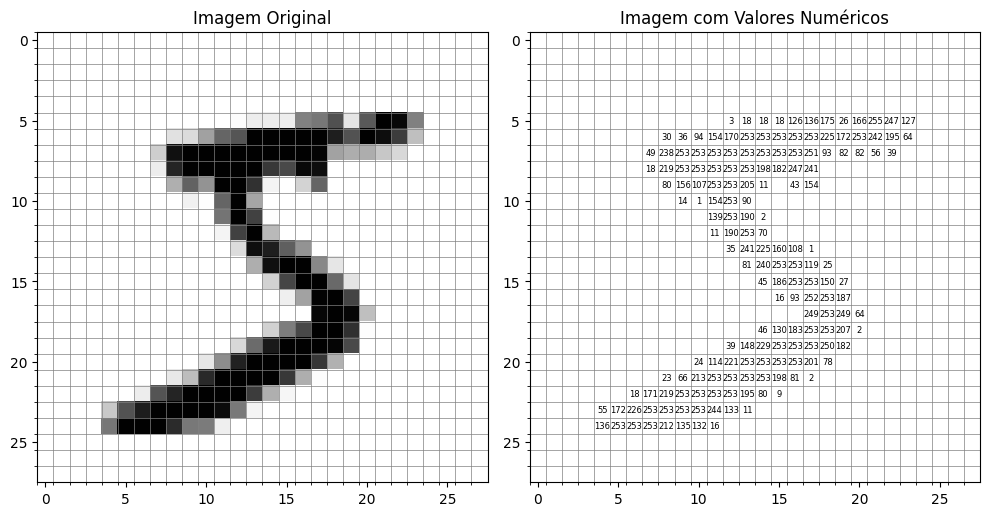

In [ ]:
# Importa bibliotecas necessárias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Seleciona um dígito e ajusta sua forma para 28x28 pixels
imagem_digito = X[0].reshape(28, 28)

# Configura o layout para exibir duas figuras lado a lado
fig, eixos = plt.subplots(1, 2, figsize=(10, 5))

# Primeira visualização: imagem original em escala de cinza com grade
ax1 = eixos[0]
ax1.imshow(imagem_digito, cmap="binary")
ax1.set_title("Imagem Original")
ax1.axis("on")

# Adiciona linhas de grade para coincidir com os limites dos pixels
ax1.set_xticks(np.arange(-0.5, 27, 1), minor=True)
ax1.set_yticks(np.arange(-0.5, 27, 1), minor=True)
ax1.grid(which="minor", color="gray", linestyle="-", linewidth=0.5)

# Segunda visualização: fundo branco com valores numéricos dos pixels
ax2 = eixos[1]
ax2.set_title("Imagem com Valores Numéricos")
ax2.axis("on")
ax2.imshow(np.ones((28, 28)), cmap="gray", vmin=0, vmax=1)

# Adiciona linha de grade também na figura da direita
ax2.set_xticks(np.arange(-0.5, 27, 1), minor=True)
ax2.set_yticks(np.arange(-0.5, 27, 1), minor=True)
ax2.grid(which="minor", color="gray", linestyle="-", linewidth=0.5)

# Exibe os valores dos pixels, omitindo zeros para melhor clareza
for i in range(28):
    for j in range(28):
        valor = int(imagem_digito[i, j])
        if valor != 0:
            ax2.text(j, i, str(valor), ha="center", va="center", color="black", fontsize=6)

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()

O algarismo parece com um 5, e é justamente isso que o rótulo nos informa:

In [ ]:
y[0]

'5'

In [ ]:
type(y[0])

str

Repare que o rótulo é uma string. A maioria dos algoritmos de Aprendizado de Máquina espera números, logo converteremos `y` para inteiro.

In [ ]:
y = y.astype(np.uint8)

### **Conjuntos de Treino e Teste**

A separação inicial dos dados em conjuntos de treino e teste é crucial para assegurar uma avaliação objetiva e robusta do modelo. Das $70.000$ instâncias disponíveis, as primeiras $60.000$ são designadas para o conjunto de treinamento, onde o modelo ajusta seus parâmetros para capturar padrões e características relevantes dos dígitos. As $10.000$ instâncias restantes compõem o conjunto de teste, reservado exclusivamente para a avaliação do desempenho do modelo em dados não vistos anteriormente. Essa divisão evita a contaminação do processo de aprendizado e permite uma estimativa precisa da capacidade de generalização do modelo, reduzindo o risco de *overfitting* e fornecendo uma métrica confiável de desempenho em novas amostras.

In [ ]:
# O conjunto de dados é dividido em 60.000 instâncias para o conjunto de treinamento.
X_train, y_train = X[:60000], y[:60000]

# E as 10.000 instâncias restantes são alocadas ao conjunto de teste.
X_test, y_test = X[60000:], y[60000:]

### **Treinando um classificador Binário**

Po ora, vamos simplificar as coisas e tentar identificar somente um algarismo, por exemplo, o número 5. Esse "5-detector" será um exemplo de classificador binário capaz de fazer distinções entre apenas duas classes, 5 e não-5. Vamos criar os vetores-alvo para essa tarefa:

In [ ]:
# True para todos os 5s, False para todos os outros algarismos.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Vamos definir um classificador e realizar seu treinamento. Um ponto de partida adequado é o [SGDClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html), que possui alta eficiência para processar grandes conjuntos de dados ao otimizar funções de perda via Gradiente Descendente Estocástico. Para um fluxo de trabalho automatizado, incorporaremos o SGDClassifier como uma etapa da pipeline e executaremos seu treinamento.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# Definindo o pipeline com duas etapas: escalonador e classificador
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(random_state=42))
])

# Treina o modelo com o conjunto de treino
sgd_clf.fit(X_train, y_train_5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd_clf', SGDClassifier(random_state=42))])

Agora, o modelo treinado pode ser utilizado para inferência, realizando a predição sobre uma amostra específica de algarismo fornecida.








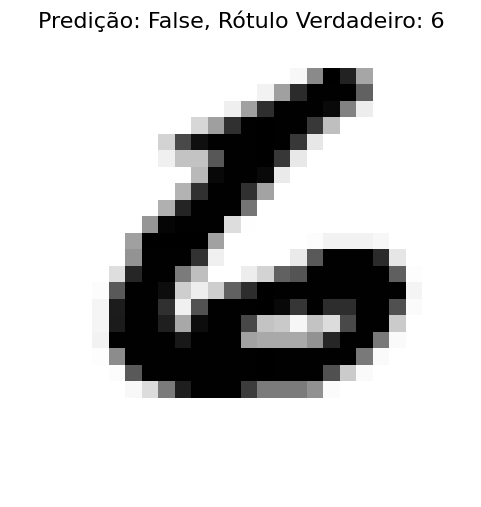

In [ ]:
# Define o índice do exemplo desejado para análise
indice = -1

# Realiza a predição para a amostra especificada
predicao = sgd_clf.predict([X_test[indice]])
rotulo_verdadeiro = y_test[indice]

# Configura a visualização da imagem do dígito com a predição e o rótulo verdadeiro
plt.figure(figsize=(6, 6))

# Exibe a imagem do dígito em escala de cinza
imagem = X_test[indice].reshape(28, 28)
plt.imshow(imagem, cmap='binary', vmin=0, vmax=255)
plt.axis('off')  # Oculta os eixos para melhor clareza da imagem

# Adiciona título com a predição e o rótulo verdadeiro para comparação
plt.title(f'Predição: {predicao[0]}, Rótulo Verdadeiro: {rotulo_verdadeiro}', fontsize=16, color='black')
plt.show()

#### **Exercício:**

Crie um classificador binário que diferencia dígitos pares (0, 2, 4, 6, 8) de ímpares (1, 3, 5, 7, 9).



**1. Preparação dos Dados:**

- Rotule cada instância como "par" ou "ímpar". Para facilitar, defina:

In [ ]:
y_train_par = (y_train % 2 == 0)  # True para dígitos pares, False para ímpares
y_test_par = (y_test % 2 == 0)    # True para dígitos pares, False para ímpares

**2. Treinamento do Modelo**

- Escolha um classificador binário (por exemplo, [SGDClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html) ou [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html))
- Treine o modelo com os dados de treinamento `X_train` e `y_train_par`.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Definindo o pipeline com escalonador e classificador
lr_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_clf', LogisticRegression(random_state=42))
])

# Treina o modelo com o conjunto de treino
lr_clf.fit(X_train, y_train_par)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_clf', LogisticRegression(random_state=42))])

**3. Visualização dos Resultados:**
- Selecione alguns exemplos de teste e exiba a imagem de cada algarismo com sua predição (par ou ímpar) e o rótulo verdadeiro.

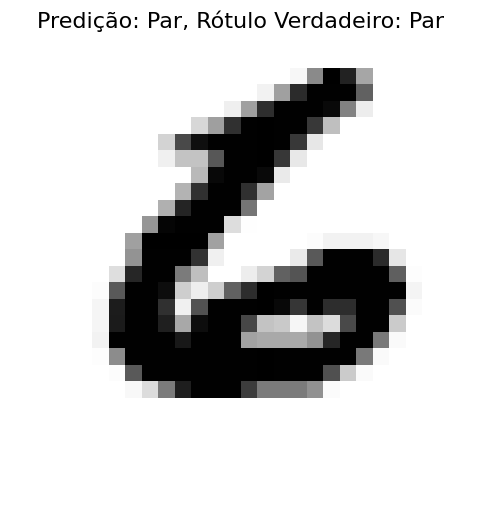

In [ ]:
# Defina o índice do exemplo desejado para inspeção
indice = -1

# Realiza a predição para a amostra especificada
predicao = lr_clf.predict([X_test[indice]])
rotulo_verdadeiro = y_test_par[indice]

# Configura a visualização da imagem do dígito com a predição e o rótulo verdadeiro
plt.figure(figsize=(6, 6))

# Exibe a imagem do dígito em escala de cinza
imagem = X_test[indice].reshape(28, 28)
plt.imshow(imagem, cmap='binary', vmin=0, vmax=255)
plt.axis('off')  # Oculta os eixos para melhorar a clareza da imagem

# Adiciona título com a predição e o rótulo verdadeiro para comparação
plt.title(f'Predição: {"Par" if predicao[0] else "Ímpar"}, Rótulo Verdadeiro: {"Par" if rotulo_verdadeiro else "Ímpar"}',
          fontsize=16, color='black')
plt.show()

### **Acurácia do Classificador Binário**

A acurácia é uma métrica de desempenho utilizada para avaliar a eficácia de um modelo de classificação. Ela é definida como a proporção de previsões corretas em relação ao total de previsões realizadas. Em outras palavras, a acurácia indica a porcentagem de instâncias que foram classificadas corretamente pelo modelo em relação ao total de instâncias no conjunto de dados. A fórmula para calcular a acurácia é:

$\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Total de previsões}}$

#### **Acurácia no Conjunto de Testes**

Para calcular a acurácia no conjunto de testes, seguimos estas etapas:

- **Fazer previsões:** Utilizamos o modelo treinado para prever os rótulos das instâncias no conjunto de testes.
- **Comparar previsões com rótulos verdadeiros:** Comparamos as previsões do modelo com os rótulos reais do conjunto de testes.
- **Contar previsões corretas:** Contamos quantas previsões estão corretas.
- **Calcular a acurácia:** Dividimos o número de previsões corretas pelo total de previsões no conjunto de testes.

In [ ]:
# Fazendo previsões no conjunto de testes
y_pred_test = sgd_clf.predict(X_test)

# Contando previsões corretas
n_correct_test = sum(y_pred_test == y_test_5)

# Calculando a acurácia
acuracia_test = n_correct_test / len(y_test_5)
print(f'Acurácia no conjunto de testes: {acuracia_test:.4f}')

Acurácia no conjunto de testes: 0.9720


##### **Exercício**

Calcular a acurácia do seu classificador em identificar corretamente dígitos pares e ímpares no conjunto de testes.



In [ ]:
# Importa as bibliotecas necessárias
from sklearn.metrics import accuracy_score

# Realiza as predições no conjunto de teste
y_pred = lr_clf.predict(X_test)

# Calcula a acurácia geral
acuracia_total = accuracy_score(y_test_par, y_pred)
print(f'Acurácia total do classificador: {acuracia_total:.4f}')

Acurácia total do classificador: 0.9017


##### **Observação**

A avaliação de um modelo preditivo com base em um único conjunto de teste pode resultar em resultados enviesados. Quando os dados de teste não refletem adequadamente a distribuição do conjunto de dados original, a acurácia do modelo pode ser superestimada ou subestimada. Para mitigar esse problema, a técnica de validação cruzada é empregada.

#### **Acurácia na Validação Cruzada**

Essa abordagem divide o conjunto de dados em múltiplas partes (ou *folds*), assegurando que cada instância do conjunto seja utilizada tanto para treinamento quanto para validação. Isso resulta em uma avaliação mais equilibrada e precisa do desempenho do modelo. Neste contexto, utilizaremos a validação cruzada estratificada, implementada pela classe [StratifiedKFold](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html) da biblioteca *sklearn*. Essa técnica permite dividir o conjunto de dados em várias partes (neste caso, 3 divisões), mantendo a proporção das classes em cada *fold*. Assim, cada parte representa de forma adequada a distribuição original das classes, resultando em uma avaliação mais robusta da eficácia do modelo.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np

# Inicializa o StratifiedKFold com 3 divisões, embaralhando os dados e definindo uma semente para reprodutibilidade
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Lista para armazenar as acurácias de cada fold
acuracias = []

# Loop para dividir os dados em conjuntos de treinamento e teste
for indice_treino, indice_teste in skfolds.split(X_train, y_train_5):
    # Clona o classificador SGD para garantir que cada fold tenha seu próprio modelo
    classificador_clonado = clone(sgd_clf)

    # Separa os dados de treinamento e teste com base nos índices
    X_train_folds = X_train[indice_treino]
    y_train_folds = y_train_5[indice_treino]
    X_test_fold = X_train[indice_teste]
    y_test_fold = y_train_5[indice_teste]

    # Treina o classificador com os dados de treinamento
    classificador_clonado.fit(X_train_folds, y_train_folds)

    # Faz previsões com os dados de teste
    y_pred = classificador_clonado.predict(X_test_fold)

    # Calcula o número de previsões corretas
    n_corretas = sum(y_pred == y_test_fold)

    # Calcula a acurácia para este fold e adiciona à lista
    acuracia = n_corretas / len(y_pred)
    acuracias.append(acuracia)

    # Exibe a acurácia do modelo para este fold
    print(f'Acurácia do fold: {acuracia:.4f}')

# Calcula a média e o desvio padrão das acurácias
media_acuracia = np.mean(acuracias)
desvio_acuracia = np.std(acuracias)

print(f'Média das acurácias: {media_acuracia:.4f}')
print(f'Desvio padrão das acurácias: {desvio_acuracia:.4f}')

Acurácia do fold: 0.9683
Acurácia do fold: 0.9684
Acurácia do fold: 0.9704
Média das acurácias: 0.9690
Desvio padrão das acurácias: 0.0009


A validação cruzada é fundamental nesse processo, pois permite uma avaliação mais robusta do modelo, mitigando o risco de *overfitting*. Ao dividir os dados em múltiplos folds e treinar e testar o modelo em diferentes subconjuntos, a validação cruzada oferece uma estimativa confiável do desempenho geral. Esse método também ajuda a identificar variações no desempenho do modelo, como observado pelo desvio padrão baixo, que reforça a estabilidade do modelo em diferentes amostras.

##### **Exercício**

Calcular a acurácia do seu classificador em identificar corretamente algarismos pares utilizando validação cruzada estratificada.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Definindo o pipeline com escalonador e classificador
lr_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_clf', LogisticRegression(random_state=42))
])

# Inicializa o StratifiedKFold com 3 divisões
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Calcula a acurácia usando validação cruzada
acuracias = cross_val_score(lr_clf, X_train, y_train_par, cv=skfolds, scoring="accuracy")

# Exibe as acurácias dos folds, a acurácia média e o desvio padrão
print("Acurácias dos folds:", acuracias)
print(f'Média das acurácias: {np.mean(acuracias):.4f}')
print(f'Desvio padrão das acurácias: {np.std(acuracias):.4f}')

Acurácias dos folds: [0.89815 0.89905 0.89715]
Média das acurácias: 0.8981
Desvio padrão das acurácias: 0.0008


##### **Observação**

Embora tanto o classificador para o algarismo "5" quanto o classificador para pares tenham alcançado acurácias superiores a 90%, é fundamental considerar as diferenças na distribuição das classes ao interpretar esses resultados.

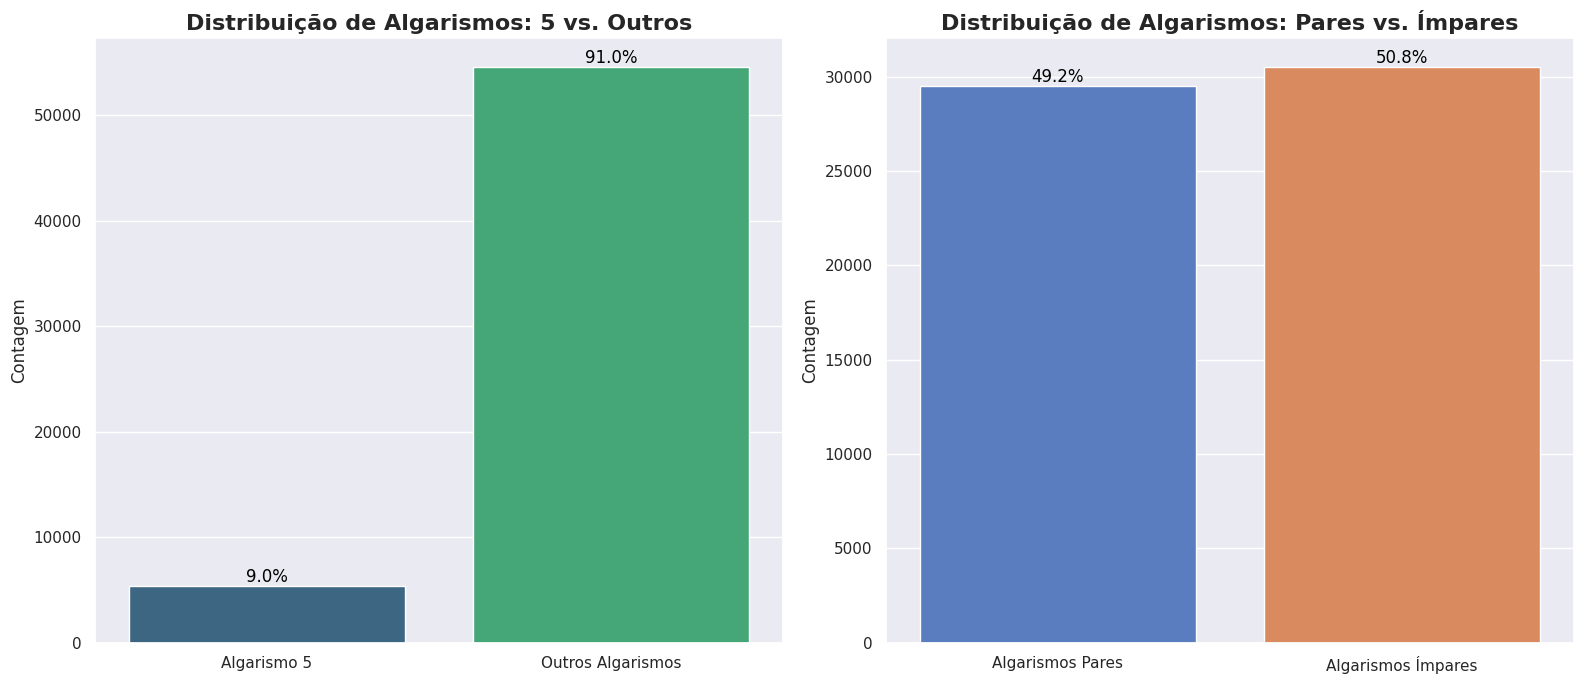

In [ ]:
import seaborn as sns

# Configura o estilo e a paleta de cores com Seaborn
sns.set_theme(style="darkgrid")
cores_5 = sns.color_palette("viridis", 2)
cores_par_impar = sns.color_palette("muted", 2)

total_amostras = len(y_train)

# Contagem dos dígitos pares
n_pares = np.sum(y_train_par)
n_impares = total_amostras - n_pares

# Contagem do dígito 5 e outros
n_5 = np.sum(y_train_5)
n_outros = total_amostras - n_5
labels_5 = ['Algarismo 5', 'Outros Algarismos']

# Dados para pares
counts_par_impar = [n_pares, n_impares]
labels_par_impar = ['Algarismos Pares', 'Algarismos Ímpares']

# Dados para 5s
counts_5 = [n_5, n_outros]
labels_5 = ['Algarismo 5', 'Outros Algarismos']

# Cria a figura
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Função para adicionar o percentual nas barras
def add_percentage(ax, counts, total):
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

# Gráfico de barras para o dígito 5
sns.barplot(x=labels_5, y=counts_5, hue=labels_5, palette=cores_5, ax=axs[0], dodge=False, legend=False)
axs[0].set_title('Distribuição de Algarismos: 5 vs. Outros', fontsize=16, fontweight='bold')
axs[0].set_ylabel('Contagem')
add_percentage(axs[0], counts_5, total_amostras)

# Gráfico de barras para pares e ímpares
sns.barplot(x=labels_par_impar, y=counts_par_impar, hue=labels_par_impar, palette=cores_par_impar, ax=axs[1], dodge=False, legend=False)
axs[1].set_title('Distribuição de Algarismos: Pares vs. Ímpares', fontsize=16, fontweight='bold')
axs[1].set_ylabel('Contagem')
add_percentage(axs[1], counts_par_impar, total_amostras)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

O classificador de pares se beneficia de um conjunto de dados equilibrado, onde as classes estão representadas de forma mais igualitária, proporcionando uma avaliação robusta da acurácia e refletindo com precisão a eficácia do modelo. Por outro lado, o classificador para "5" lida com um desbalanceamento significativo, com a classe "5" tendo muitos menos exemplos em comparação com os demais algarismos.

##### **Alta Acurácia em Classes Desbalanceadas**

Uma alta acurácia pode ser enganosa, pois o modelo pode tendenciar a prever a classe majoritária com mais frequência, comprometendo a efetividade real da classificação. Vejamos um classificador que somente classifica todas as imagens na classe "não-5":

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

Vamos estimar a acurácia desse modelo através da validação cruzada estratificada.

In [ ]:
# Inicializa e avalia o classificador "Never5"
never_5_clf = Never5Classifier()
acuracias = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Exibe as acurácias dos folds, a acurácia média e o desvio padrão
print("Acurácias dos folds:", acuracias)
print(f'Média das acurácias: {acuracias.mean():.4f}')
print(f'Desvio padrão das acurácias: {acuracias.std():.4f}')

Acurácias dos folds: [0.91125 0.90855 0.90915]
Média das acurácias: 0.9096
Desvio padrão das acurácias: 0.0012


Como o modelo simplesmente classificar todas as imagens como "não $5$", ele alcançará uma taxa de acerto de aproximadamente $90$%, considerando que aproximadamente $90$% das imagens não pertence à classe "$5$". Esse comportamento ressalta que a alta acurácia observada pode não refletir a eficácia real do classificador, mas sim a predominância da classe majoritária. Portanto, a acurácia isolada pode ser um indicador enganoso de desempenho em conjuntos de dados desbalanceados, uma vez que o modelo pode obter bons resultados sem necessariamente aprender a distinguir corretamente as classes.

###### **Exercício**

Crie um classificador chamado `NeverOddClassifier`, que classifica todas as entradas como pertencentes à classe "par". Em seguida, estime a acurácia desse modelo utilizando validação cruzada estratificada para garantir uma representação equilibrada das classes em cada divisão. Compare os resultados de acurácia deste modelo com os classificadores desenvolvido anteriormente.

In [ ]:
class NeverOddClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  def predict(self, X):
    return np.ones(X.shape[0], dtype=int)

In [ ]:
# Inicializa e avalia o classificador "NeverOddClassifier"
never_odd_clf = NeverOddClassifier()
acuracias = cross_val_score(never_odd_clf, X_train, y_train_par, cv=3, scoring="accuracy")

# Exibe as acurácias dos folds, a acurácia média e o desvio padrão
print("Acurácias dos folds:", acuracias)
print(f'Média das acurácias: {acuracias.mean():.4f}')
print(f'Desvio padrão das acurácias: {acuracias.std():.4f}')

Acurácias dos folds: [0.48805 0.4925  0.49405]
Média das acurácias: 0.4915
Desvio padrão das acurácias: 0.0025


**Análise da Acurácia:**

- `NeverOddClassifier` tem uma acurácia média de aproximadamente $49.15$%. Isso indica que ele classifica corretamente apenas cerca de metade das amostras, sugerindo uma performance quase aleatória em um contexto binário.
- `Never5Classifier`, por outro lado, tende a exibir uma acurácia muito mais alta (por exemplo, acima de $90$%), porque a classe "5" representa apenas cerca de $10$% das imagens. Isso significa que, ao prever que todas as imagens não são "5", o classificador está correto na maioria das vezes, mas isso reflete mais a distribuição das classes do que a capacidade preditiva real.

**Implicações Práticas:**

- `NeverOddClassifier` pode ser considerado um modelo de referência fraco, que simplesmente não é eficaz em capturar padrões nos dados e, portanto, é impróprio para aplicações práticas onde a classificação precisa ser significativa.

- `Never5Classifier`, embora com alta acurácia, não é um bom classificador, pois sua performance é enganosa. Ele pode levar a um falso senso de segurança sobre a eficácia do modelo, ocultando a realidade de que ele não consegue identificar corretamente a classe "5".

### **Matriz de Confusão**

Embora a acurácia seja uma métrica útil, ela pode não ser adequada para avaliar o desempenho do classificador de "$5$", devido ao desbalanceamento de classes. Nesses casos, é importante complementar a análise com outras métricas, como a [matriz de confusão](https://pt.wikipedia.org/wiki/Matriz_de_confus%C3%A3o#:~:text=Em%20an%C3%A1lise%20preditiva%2C%20a%20matriz,verdadeiros%20positivos%20e%20verdadeiros%20negativos%20.), que detalha as classificações entre as classes, e permite identificar se o modelo está realmente distinguindo bem a classe minoritária. Além disso, utilizar métricas como a precisão, a sensibilidade e a pontuação F1 oferece uma visão mais completa da eficácia do modelo, destacando sua capacidade de identificar corretamente a classe de interesse e reduzindo o impacto de uma possível alta acurácia "enganosa".

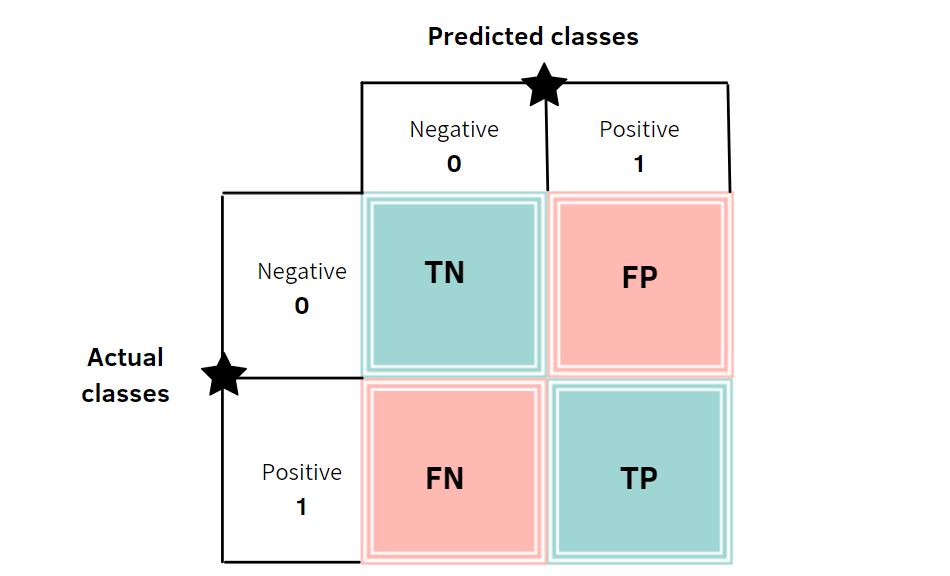

Na matriz, temos o seguintes elementos:

- **TN** = Verdadeiros Negativos (que são classificados corretamente como não 5's)
- **FP** = Falsos Positivos (que são classificados como 5's, mas não são 5's)
- **FN** = Falsos Negativos (que são classificados como não 5's, mas são 5's)
- **TP** = Verdadeiros Positivos (que são classificados corretamente como 5's)

Para gerar a matriz de confusão, é necessário dispor do conjunto de previsões do modelo, que será comparado com os valores reais. Para isso, o [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) é uma ferramenta útil. Ele realiza a validação cruzada e retorna as previsões de cada amostra ao longo dos folds, como se fossem de um modelo treinado fora do respectivo fold. Isso permite obter previsões consistentes para o conjunto completo de dados, simulando o desempenho do modelo em amostras não vistas e possibilitando a avaliação precisa com a matriz de confusão.



In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

As previsões podem agora ser comparadas aos valores reais, possibilitando uma análise detalhada do desempenho pela matriz de confusão.

In [ ]:
from sklearn.metrics import confusion_matrix

# Gera a matriz de confusão com os valores reais e previstos
confusion_mat = confusion_matrix(y_true=y_train_5, y_pred=y_train_pred)

# Exibe a matriz de confusão
print("Matriz de Confusão:")
print(confusion_mat)

Matriz de Confusão:
[[53927   652]
 [ 1228  4193]]


Para uma visualização mais intuitiva dos resultados da matriz de confusão, podemos usar um mapa de calor com *seaborn*.


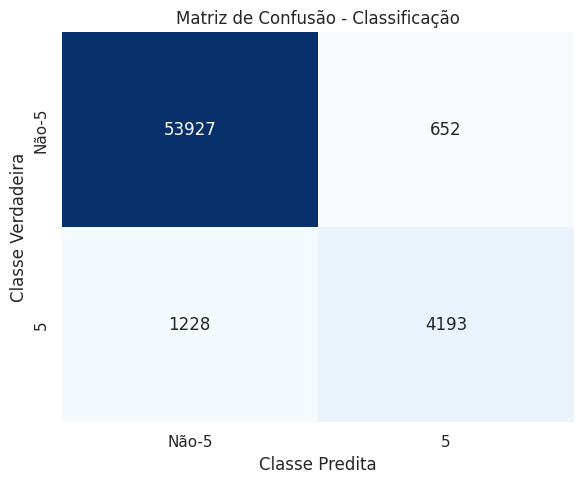

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração da figura e do mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não-5', '5'], yticklabels=['Não-5', '5'])

# Rótulos e título aprimorados
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão - Classificação')
plt.tight_layout()
plt.show()

#### **Exercício**

Crie e visualize a matriz de confusão para as previsões dos classificadores `Never5Classifier` e `NeverOddClassifier`.









### **Métricas Derivadas da Matriz de Confusão**

A matriz de confusão oferece uma gama de informações sobre o desempenho do modelo. Métricas fundamentais derivadas dela são:

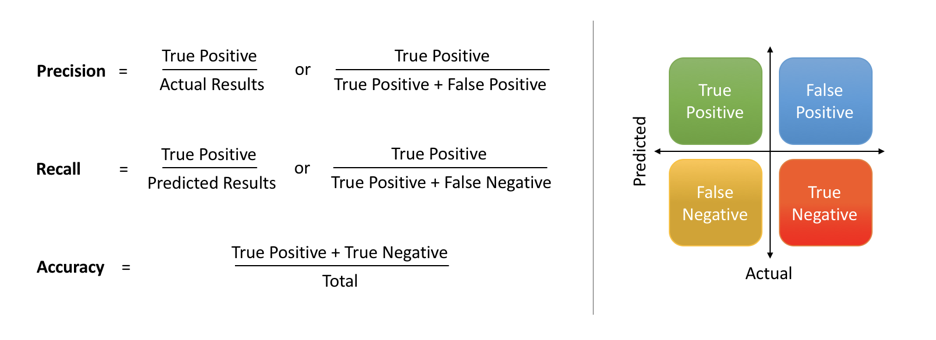

#### **Precisão e Sensibilidade**

**Precisão** avalia a proporção de verdadeiros positivos em relação ao total de previsões positivas realizadas pelo modelo. Essa métrica indica quantas das previsões positivas feitas são realmente corretas, fornecendo uma perspectiva sobre a exatidão do classificador ao identificar a classe positiva. Por outro lado, a revocação, também conhecida como **sensibilidade**, mede a proporção de verdadeiros positivos em relação ao total de casos que realmente pertencem à classe positiva. Essa métrica é especialmente importante em contextos onde a identificação correta da classe positiva é crítica, refletindo a capacidade do modelo de captar todos os casos relevantes da classe de interesse.

#### **Precisão**

Calculando através de [precision_score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.precision_score.html) do `sklearn.metrics`

In [ ]:
from sklearn.metrics import precision_score

# Calcula e exibe a precisão do modelo
precision = precision_score(y_train_5, y_train_pred)
print(f'Precisão do modelo: {precision:.4f}')

Precisão do modelo: 0.8654


Calculando manualmente, através da matriz de confusão

In [ ]:
# Cria a matriz de Confusão
cm = confusion_matrix(y_train_5, y_train_pred)

# Calcula a precisão manualmente
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])

# Exibe o valor da precisão calculada
print(f'Precisão do modelo: {precision:.4f}')

Precisão do modelo: 0.8654


#### **Sensibilidade**

Calculando através de [recall_score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.recall_score.html) do `sklearn.metrics`

In [ ]:
from sklearn.metrics import recall_score

# Calcula e exibe a sensibilidade do modelo
recall = recall_score(y_train_5, y_train_pred)
print(f'Sensibilidade do modelo: {recall:.4f}')

Sensibilidade do modelo: 0.7735


Calculando manualmente, através da matriz de confusão

In [ ]:
# Cria a matriz de Confusão
cm = confusion_matrix(y_train_5, y_train_pred)

# Calcula a sensibilidade manualmente
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Exibe o valor da sensibilidade calculada
print(f'Sensibilidade do modelo: {recall:.4f}')

Sensibilidade do modelo: 0.7735


#### **F1**

É a média harmônica entre a precisão e a sensibilidade, atingindo altos valores apenas quando ambas são elevadas. Isso indica um bom equilíbrio na identificação correta dos casos positivos e na minimização de falsos positivos, oferecendo uma visão do desempenho do classificador em situações onde é fundamental considerar a exatidão das previsões e a capacidade de detectar os casos relevantes.

$F1 = \frac{2 * precision * recall}{precision + recall}$

Calculando através de [f1_score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html) do `sklearn.metrics`

In [ ]:
from sklearn.metrics import f1_score

# Calcula e exibe a f1-score do modelo
f1 = f1_score(y_train_5, y_train_pred)
print(f'F1-score do modelo: {f1:.4f}')

F1-score do modelo: 0.8169


Calculando manualmente, através da matriz de confusão

In [ ]:
# Cria a matriz de Confusão
cm = confusion_matrix(y_train_5, y_train_pred)

# Calcula f1-score manualmente
f1 = cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

# Exibe o valor da f1-score calculada
print(f'F1-score do modelo: {f1:.4f}')

F1-score do modelo: 0.8169


##### **Exercício**

Demonstrar que $\frac{2 * precision * recall}{precision + recall} == \frac{TP}{TP + \frac{FN+FP}{2}}$.

- **Fórmula do F1-Score**

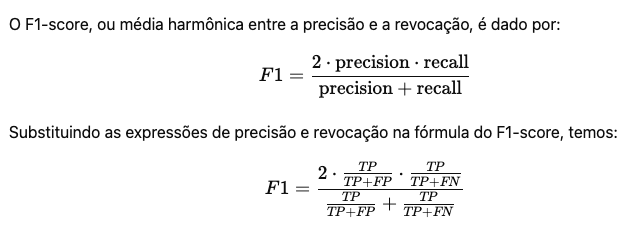

- **Simplificação do F1-Score**

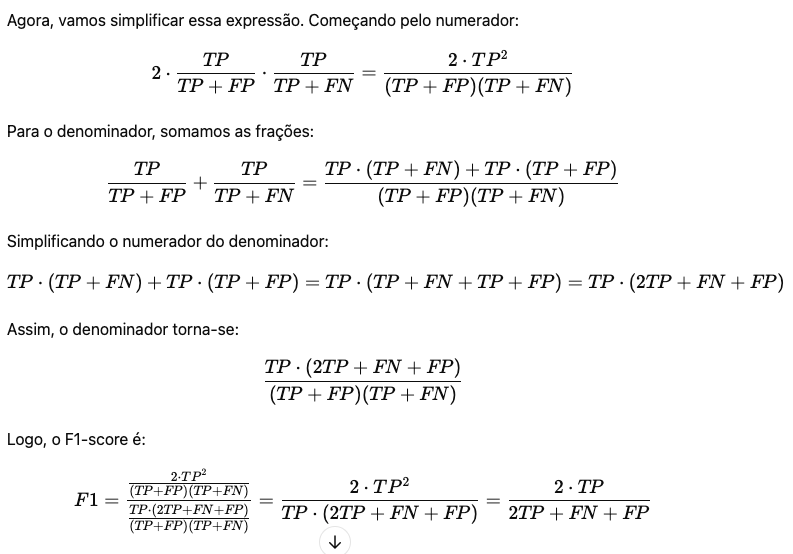

- **Expressão Alternativa do F1-Score**


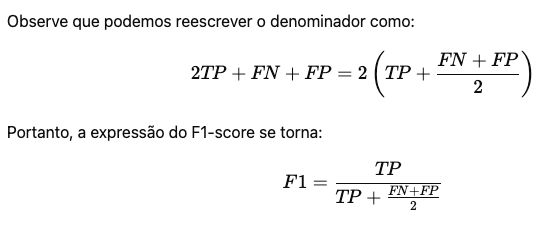

### **Trade-off precisão/sensibilidade**

No uso do `SGDClassifier`, assim como em outros classificadores, o ajuste do *threshould* (limiar de decisão) impacta o equilíbrio entre precisão (quantos positivos preditos são realmente positivos) e sensibilidade (quantos dos positivos reais foram identificados corretamente). Quando aumentamos o limiar, o modelo fica mais rigoroso para considerar uma amostra como positiva. Isso aumenta a precisão, pois reduz os falsos positivos, mas diminui a sensibilidade, deixando escapar alguns positivos reais. Por outro lado, ao diminuir o limiar, aumentamos a sensibilidade, captando mais positivos reais, mas também aumentamos o risco de falsos positivos, o que pode reduzir a precisão.

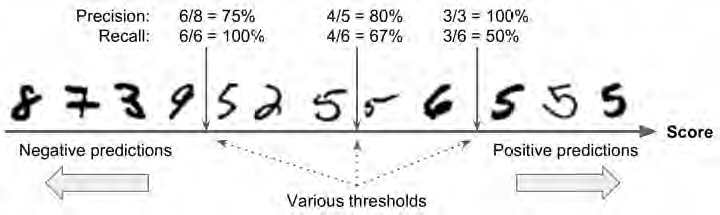

O *Scikit-Learn* não permite definir diretamente o limiar de decisão, mas fornece acesso às pontuações de decisão que utiliza para fazer previsões. Em vez de chamar o método `predict` do classificador, você pode chamar o método `decision_function`, que retorna uma pontuação para cada instância, e então fazer previsões com base nessas pontuações usando qualquer limiar desejado.

In [ ]:
# Obtendo a pontuação de decisão para o segundo item do conjunto de teste
indice = -2  # Escolhendo o penultimo item do conjunto de teste
y_scores = sgd_clf.decision_function([X_test[indice]])
y_scores

array([395.62693284])

In [ ]:
limiar = 0
y_pred = (y_scores > limiar)
y_pred

array([ True])

O `SGDClassifier` utiliza um limiar padrão de $0$, o que faz com que o código anterior produza o mesmo resultado que o método `predict()` (isto é, uma previsão positiva, ou $True$). Para modificar esse comportamento, vamos ajustar o limiar para um valor mais alto:

In [ ]:
limiar = 8000
y_pred = (y_scores > limiar)
y_pred

array([False])

A imagem corresponde ao número 5, que é corretamente classificado pelo modelo quando o limiar é 0. Ao aumentar o limiar para 8000, resulta em falha na identificação do número 5. Isso demonstra como o ajuste do limiar impacta a capacidade do classificador em identificar corretamente as instâncias, com um trade-off entre a sensibilidade e o controle de falsos positivos.








In [ ]:
y_test[indice], y_test_5[indice]

(5, True)

A escolha entre melhorar a sensibilidade ou a precisão depende das consequências dos erros. Se for mais crítico identificar todos os casos positivos, mesmo ao custo de aumentar os falsos positivos, a sensibilidade deve ser priorizada. Se os falsos positivos tiverem um custo alto, a precisão deve ser o foco. Em muitos cenários, o equilíbrio entre ambas as métricas pode ser alcançado por meio de ajustes finos no limiar.

#### **Sensibilidade**

A sensibilidade é a capacidade de identificar corretamente os exemplos positivos. Em situações onde é crítico identificar o maior número possível de casos positivos, mesmo que isso implique um aumento nos falsos positivos, deve-se priorizar a sensibilidade. Exemplos incluem:

- **Diagnóstico médico:** Em doenças graves, como o câncer, é crucial detectar todos os casos positivos, pois perder um paciente com a doença pode ter consequências fatais. Nesse caso, é preferível classificar erroneamente alguns casos saudáveis como doentes (falsos positivos) a deixar de identificar um doente (falso negativo).

- **Detecção de fraude:** Em sistemas de prevenção à fraude financeira, é importante detectar todas as transações fraudulentas possíveis, mesmo que algumas transações legítimas sejam marcadas incorretamente como fraudulentas (falsos positivos), para minimizar o risco de não identificar fraudes reais.

- **Segurança pública:** Na vigilância de segurança, pode ser mais importante errar ao identificar uma ameaça (falso positivo) do que deixar de identificar uma ameaça real (falso negativo), para garantir a proteção das pessoas.

#### **Precisão**

A precisão é a capacidade de evitar identificar incorretamente os exemplos negativos como positivos. Em contextos onde o custo de falsos positivos é alto, é preferível melhorar a precisão. Exemplos incluem:

- **Filtragem de e-mails de spam:** Em sistemas de detecção de spam, é importante evitar classificar erroneamente e-mails legítimos como spam, pois isso pode resultar na perda de informações importantes. Nesse caso, o objetivo é reduzir ao máximo os falsos positivos, mesmo que isso signifique deixar passar alguns e-mails de spam.

- **Classificação de imagens em redes sociais:** Em plataformas que categorizam imagens (como identificar se uma imagem contém um objeto específico), é crucial garantir que as imagens classificadas como contendo o objeto estejam corretas, para evitar que o sistema promova conteúdo errôneo.

- **Controle de qualidade na produção:** Em processos industriais de controle de qualidade, o objetivo pode ser minimizar o risco de liberar um produto defeituoso (falso negativo). Para isso, pode-se priorizar a precisão para garantir que os produtos identificados como defeituosos realmente o sejam, sem enganos.

### **A Curva ROC**


A curva de características operacionais do receptor (ROC, na sigla em inglês) é uma ferramenta comum utilizada com classificadores binários. Ela plota a taxa de verdadeiros positivos (recall) contra a taxa de falsos positivos (FPR). A FPR é a proporção de instâncias negativas que são classificadas incorretamente como positivas. Ela é igual a 1 menos a taxa de verdadeiros negativos (TNR), que representa a proporção de instâncias negativas corretamente identificadas como negativas. A TNR também é chamada de especificidade. Assim, a curva ROC mostra a relação entre sensibilidade (recall) e 1 – especificidade. Essa curva é útil para avaliar o desempenho de um modelo, especialmente quando as classes estão desbalanceadas, pois permite comparar diferentes limiares de decisão e seu impacto na performance do modelo.

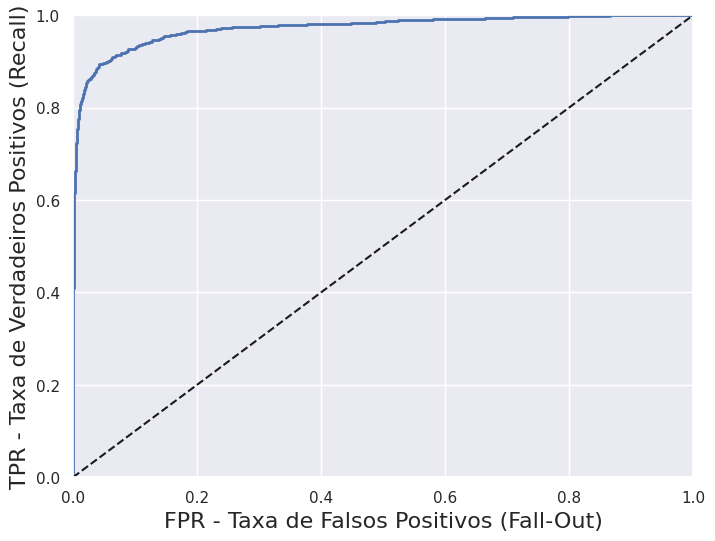

In [ ]:
from sklearn.metrics import roc_curve

# Calculando as pontuações de decisão para as instâncias do conjunto de teste
y_scores = sgd_clf.decision_function(X_test)

# Calculando a FPR (taxa de falsos positivos) e TPR (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)

# Função para plotar a curva ROC
def plotar_curva_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal pontilhada
    plt.axis([0, 1, 0, 1])  # Definindo os limites dos eixos
    plt.xlabel('FPR - Taxa de Falsos Positivos (Fall-Out)', fontsize=16)
    plt.ylabel('TPR - Taxa de Verdadeiros Positivos (Recall)', fontsize=16)
    plt.grid(True)

# Configurando o tamanho da figura
plt.figure(figsize=(8, 6))

# Plotando a curva ROC
plotar_curva_roc(fpr, tpr)

# Exibindo o gráfico
plt.show()

Para comparar diferentes classificadores, uma das métricas utilizadas é a AUC (Área sob a Curva). Um classificador perfeito terá uma AUC da curva ROC igual a 1. Para calcular a AUC, o scikit-learn fornece a função [roc_auc_score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.roc_auc_score.html).

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_5, y_scores)

0.972986223120265

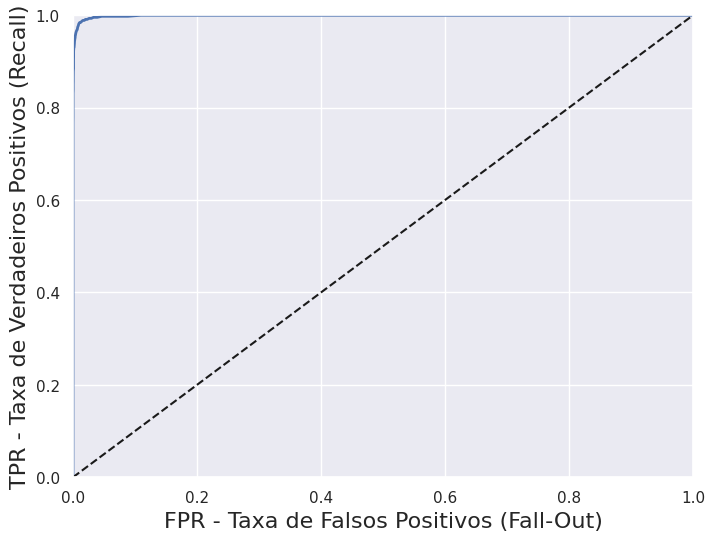

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Criando o modelo RandomForest
rf_clf = RandomForestClassifier()

# Ajustando o modelo ao conjunto de treinamento
rf_clf.fit(X_train, y_train_5)

# Calculando as probabilidades da classe positiva (classe 1) para o conjunto de teste
y_scores = rf_clf.predict_proba(X_test)[:, 1]

# Calculando a FPR (taxa de falsos positivos) e TPR (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)

# Função para plotar a curva ROC
def plotar_curva_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal pontilhada
    plt.axis([0, 1, 0, 1])  # Definindo os limites dos eixos
    plt.xlabel('FPR - Taxa de Falsos Positivos (Fall-Out)', fontsize=16)
    plt.ylabel('TPR - Taxa de Verdadeiros Positivos (Recall)', fontsize=16)
    plt.grid(True)

# Configurando o tamanho da figura
plt.figure(figsize=(8, 6))

# Plotando a curva ROC
plotar_curva_roc(fpr, tpr)

# Exibindo o gráfico
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_5, y_scores)

0.9991182048600649

https://www.kaggle.com/code/supreeth888/classification-hands-on-machine-learning